In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


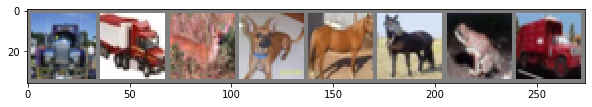

     truck    truck     deer      dog    horse    horse     frog    truck


In [4]:
batch_size = 64

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
#net = models.vgg16(pretrained=True)
solver = Solver(net, trainloader, testloader, optim = 'adam', num_epochs=5)

In [6]:
solver.train()

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,       100]    2.05927972 |        0.24453125
[    1,       200]    1.79140116 |        0.34218750
[    1,       300]    1.66479648 |        0.38343750
[    1,       400]    1.59596347 |        0.41437500
[    1,       500]    1.55177256 |        0.43265625
[    1,       600]    1.51724789 |        0.44218750
[    1,       700]    1.48209199 |        0.45718750
----------------------------------------------------
[    1,  finished]     accuracy: |        0.46800000 

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,       100]    1.43291308 |        0.47640625
[    2,       200]    1.40679711 |        0.49500000
[    2,       300]    1.37974953 |        0.50125000
[    2,       400]    1.36331260 |        0.50953125
[    2,       500]    1.33656546 |        0.51203125
[    2,       600]    1.33751252 |        0.

In [7]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

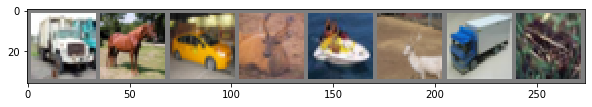

      Real:    truck    horse      car     deer     ship     deer    truck     frog
 Predicted:    truck    horse      car     deer     ship     deer    truck     frog


In [8]:
solver.predict_samples(classes)

In [9]:
solver.print_class_accuracies(classes)

Accuracy of plane : 61 %
Accuracy of   car : 65 %
Accuracy of  bird : 42 %
Accuracy of   cat : 43 %
Accuracy of  deer : 56 %
Accuracy of   dog : 44 %
Accuracy of  frog : 72 %
Accuracy of horse : 61 %
Accuracy of  ship : 74 %
Accuracy of truck : 77 %


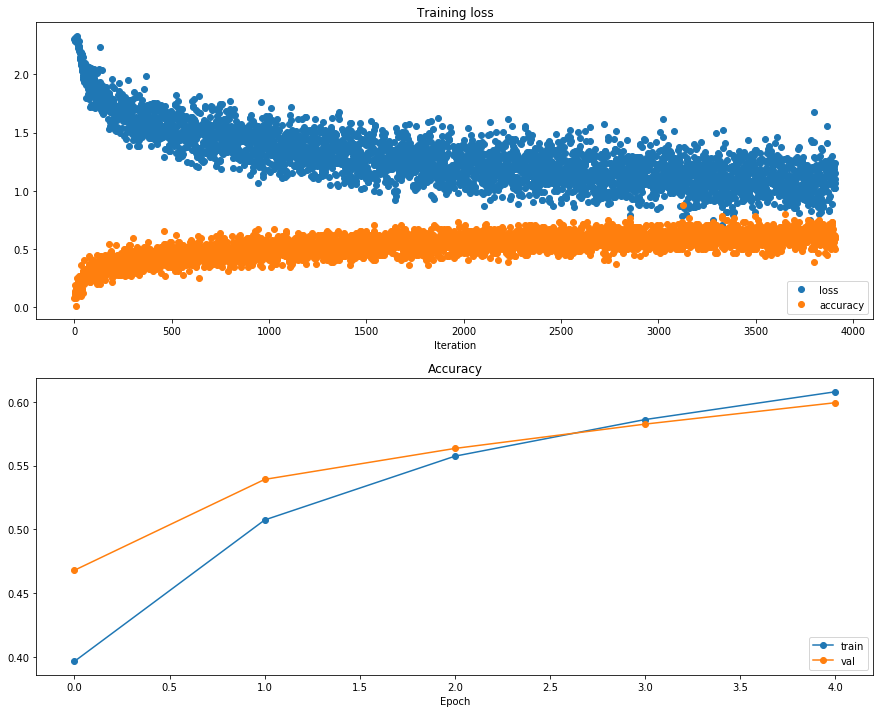

In [10]:
solver.print_plots()